## Random Forest Modeling 
### - Transformer: TfidfVectorizer
### - Stemmed words

In [1]:
# Imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Naive Bayes 
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

# Logistic Regression 
from sklearn.linear_model import LogisticRegression

# Boosting 
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

# Other Sklearn 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, plot_roc_curve, roc_auc_score, recall_score, precision_score, f1_score, classification_report

# Pipeline
from sklearn.pipeline import Pipeline, make_pipeline

# NLP imports
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# nltk.download()  --> Download all, and then restart jupyter lab
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import FreqDist, pos_tag
import re

### Loading Data and Splitting Data

In [2]:
# Load the data
df = pd.read_csv('../../../data/clean_data/clean_posts.csv', index_col=0)
df.head()

,subreddit,title,created_utc,selftext,title_selftext,author,media_only,permalink,text_length,clean_text_stem,clean_text_lem
0,tolkienfans,What happened to Tolkien’s Red Book?,1616977706,I was wondering if somebody could clear up my ...,what happened to tolkien s red book i was wond...,lukeskinwalker69epic,False,/r/tolkienfans/comments/mfdrms/what_happened_t...,322,happen tolkien red book wonder somebodi could ...,happened tolkien red book wondering somebody c...
1,tolkienfans,What Makes People Turn Invisible When the Put ...,1616971688,I guess this is a big question because I never...,what makes people turn invisible when the put ...,Jpmaniax26,False,/r/tolkienfans/comments/mfbzjh/what_makes_peop...,252,make peopl turn invis put one ring guess big q...,make people turn invisible put one ring guess ...
2,tolkienfans,"Theory: At some point not told in the Tale, Ar...",1616971077,This is the last dialogue between Queen Undómi...,theory at some point not told in the tale arag...,yew_eater,False,/r/tolkienfans/comments/mfbsks/theory_at_some_...,6045,theori point told tale aragorn arwen must seri...,theory point told tale aragorn arwen must seri...
3,tolkienfans,I’d like to purchase a matching set of books o...,1616969977,Can anyone help me out? Looking for matching b...,i d like to purchase a matching set of books o...,GoosePants72,False,/r/tolkienfans/comments/mfbfyj/id_like_to_purc...,302,like purchas match set book everyth lotr silma...,like purchase matching set book everything lot...
4,tolkienfans,"When Faramir ‘proposes’ to Eowyn, something we...",1616966528,After he confesses his love for her and talks ...,when faramir proposes to eowyn something weird...,PhendranaDrifter,False,/r/tolkienfans/comments/mfaae8/when_faramir_pr...,731,faramir propos eowyn someth weird happen confe...,faramir proposes eowyn something weird happens...


In [3]:
# Checks baseline
df['subreddit'].value_counts(normalize=True)
# df['subreddit'].value_counts()

tolkienfans    0.516823
harrypotter    0.483177
Name: subreddit, dtype: float64

In [5]:
df_sample = df.sample(100, random_state=42)

In [6]:
# Set up X and y
X = df_sample['clean_text_stem']
y = df_sample['subreddit']

# X = df['clean_text_stem']
# y = df['subreddit']

In [7]:
# Splits the data into training and test sets from sample
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify=y,
                                                    random_state=42)

### Modeling

In [61]:
# Baseline accuracy 
y_test.value_counts(normalize=True)

tolkienfans    0.516821
harrypotter    0.483179
Name: subreddit, dtype: float64

In [62]:
# Instantiates a pipeline 
pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])

In [16]:
# Creates the pipe parameters 
pipe_params = {
    'tvec__max_features': [2000, 3000, 4000, 5000],
    'tvec__min_df':[1, 2],
    'tvec__max_df':[0.90, 0.98],
    'tvec__ngram_range':[(1,1), (1,2)],
    'rf__n_estimators': [100, 150], 
    'rf__max_depth': [1, 2, 3, 4, 5],
}

In [17]:
# Instantiates the GridSearchCV
gs = GridSearchCV(pipe, 
                param_grid=pipe_params,
                cv=5, 
                verbose=1,
                 n_jobs = 4)

In [18]:
# Fits GridSearch to training data
gs.fit(X_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    9.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   24.6s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   46.0s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 1600 out of 1600 | elapsed:  1.7min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=4,
             param_grid={'rf__max_depth': [1, 2, 3, 4, 5],
                         'rf__n_estimators': [100, 150],
                         'tvec__max_df': [0.9, 0.98],
                         'tvec__max_features': [2000, 3000, 4000, 5000],
                         'tvec__min_df': [1, 2],
                         'tvec__ngram_range': [(1, 1), (1, 2)]},
             verbose=1)

In [19]:
# return the CV accuracy score
gs.best_score_

0.8533333333333333

In [20]:
# Returns the training and testing accuracy scores
gs.score(X_train, y_train), gs.score(X_test, y_test)

(0.9466666666666667, 0.88)

In [21]:
# Returns the best parameters from the gridsearch
gs.best_params_

{'rf__max_depth': 4,
 'rf__n_estimators': 150,
 'tvec__max_df': 0.9,
 'tvec__max_features': 2000,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 2)}

#### Second Iteration

In [22]:
# Instantiates a pipeline 
pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])

In [23]:
# Creates the pipe parameters 
pipe_params = {
    'tvec__max_features': [2000, 3000, 4000, 5000],
    'tvec__min_df':[1, 2],
    'tvec__max_df':[0.90, 0.98],
    'tvec__ngram_range':[(1,1), (1,2)],
    'rf__n_estimators': [100, 150, 200], 
    'rf__max_depth': [4, 20, 100, 150],
}

In [24]:
# Instantiates the GridSearchCV
gs = GridSearchCV(pipe, 
                param_grid=pipe_params,
                cv=5, 
                verbose=1,
                 n_jobs = 4)

In [25]:
# Fits GridSearch to training data
gs.fit(X_train, y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    9.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   30.7s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   54.7s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done 1920 out of 1920 | elapsed:  2.5min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=4,
             param_grid={'rf__max_depth': [4, 20, 100, 150],
                         'rf__n_estimators': [100, 150, 200],
                         'tvec__max_df': [0.9, 0.98],
                         'tvec__max_features': [2000, 3000, 4000, 5000],
                         'tvec__min_df': [1, 2],
                         'tvec__ngram_range': [(1, 1), (1, 2)]},
             verbose=1)

In [26]:
# Returns the CV accuracy score from the second gridsearch
gs.best_score_

0.8533333333333333

In [27]:
# Returns the training and testing accuracy score from the gridsearch
gs.score(X_train, y_train), gs.score(X_test, y_test)

(0.9333333333333333, 0.88)

In [28]:
# Returns the best parameters from the gridsearch
gs.best_params_

{'rf__max_depth': 4,
 'rf__n_estimators': 150,
 'tvec__max_df': 0.9,
 'tvec__max_features': 4000,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 1)}

#### **Note**: The First Iteration had the best score and best params

## Re-Run the RandomForest Model with the First Iteration Best Params

In [63]:
# Load the data
df = pd.read_csv('../../../data/clean_data/clean_posts.csv', index_col=0)
df.head()

,subreddit,title,created_utc,selftext,title_selftext,author,media_only,permalink,text_length,clean_text_stem,clean_text_lem
0,tolkienfans,What happened to Tolkien’s Red Book?,1616977706,I was wondering if somebody could clear up my ...,what happened to tolkien s red book i was wond...,lukeskinwalker69epic,False,/r/tolkienfans/comments/mfdrms/what_happened_t...,322,happen tolkien red book wonder somebodi could ...,happened tolkien red book wondering somebody c...
1,tolkienfans,What Makes People Turn Invisible When the Put ...,1616971688,I guess this is a big question because I never...,what makes people turn invisible when the put ...,Jpmaniax26,False,/r/tolkienfans/comments/mfbzjh/what_makes_peop...,252,make peopl turn invis put one ring guess big q...,make people turn invisible put one ring guess ...
2,tolkienfans,"Theory: At some point not told in the Tale, Ar...",1616971077,This is the last dialogue between Queen Undómi...,theory at some point not told in the tale arag...,yew_eater,False,/r/tolkienfans/comments/mfbsks/theory_at_some_...,6045,theori point told tale aragorn arwen must seri...,theory point told tale aragorn arwen must seri...
3,tolkienfans,I’d like to purchase a matching set of books o...,1616969977,Can anyone help me out? Looking for matching b...,i d like to purchase a matching set of books o...,GoosePants72,False,/r/tolkienfans/comments/mfbfyj/id_like_to_purc...,302,like purchas match set book everyth lotr silma...,like purchase matching set book everything lot...
4,tolkienfans,"When Faramir ‘proposes’ to Eowyn, something we...",1616966528,After he confesses his love for her and talks ...,when faramir proposes to eowyn something weird...,PhendranaDrifter,False,/r/tolkienfans/comments/mfaae8/when_faramir_pr...,731,faramir propos eowyn someth weird happen confe...,faramir proposes eowyn something weird happens...


In [64]:
# Checks baseline
df['subreddit'].value_counts(normalize=True)
# df['subreddit'].value_counts()

tolkienfans    0.516823
harrypotter    0.483177
Name: subreddit, dtype: float64

In [66]:
df_sample = df.sample(100, random_state=42)

In [67]:
# Set up X and y
# X = df_sample['clean_text_stem']
# y = df_sample['subreddit']

X = df['clean_text_stem']
y = df['subreddit']

In [68]:
# Splits the data into training and test sets from sample
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify=y,
                                                    random_state=42)

In [69]:
# Instantiates a pipeline 
pipe = Pipeline([
    ('tvec', TfidfVectorizer(max_df=0.9, max_features=2000, min_df=2, ngram_range=(1,2))),
    ('rf', RandomForestClassifier(max_depth=100, n_estimators=150))
])

In [70]:
# best estimators:
# {'rf__max_depth': 4,
#  'rf__n_estimators': 150,
#  'tvec__max_df': 0.9,
#  'tvec__max_features': 2000,
#  'tvec__min_df': 2,
#  'tvec__ngram_range': (1, 2)}

In [71]:
# Fit the data to a pipeline including a tfidfvectorizer and a random forest model
pipe.fit(X_train, y_train)

Pipeline(steps=[('tvec',
                 TfidfVectorizer(max_df=0.9, max_features=2000, min_df=2,
                                 ngram_range=(1, 2))),
                ('rf',
                 RandomForestClassifier(max_depth=100, n_estimators=150))])

In [72]:
# returns the training and testing accuracy score from the pipeline
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.979531753820272, 0.9594196804037006)

#### Evaluation

In [73]:
# Assigns variables names to the training and testing accuracy scores so that they are callable
train1, test1 = pipe.score(X_train, y_train), pipe.score(X_test, y_test)
train1, test1

(0.979531753820272, 0.9594196804037006)

In [74]:
# Calculates the y predictions and the AUC score
y_preds = pipe.predict(X_test)
auc = roc_auc_score(y_test, pipe.predict_proba(X_test)[:,1])

In [75]:
# creates the model metric row dataframe to be added to the final model metric table in the presentation
results = pd.DataFrame({'Model': ['RandomForest'], 
                        'Transformer': ['TFIDF'],
                        'Stemmed/Lemmed': ['Stemmed'],
                        'Train_acc': [train1],
                        'Test_acc': [test1], 
                        'AUC': [auc]})
results.to_csv('../../../data/result_scores/rf_tfidf_stem.csv')

In [76]:
results

,Model,Transformer,Stemmed/Lemmed,Train_acc,Test_acc,AUC
0,RandomForest,TFIDF,Stemmed,0.979532,0.95942,0.99222


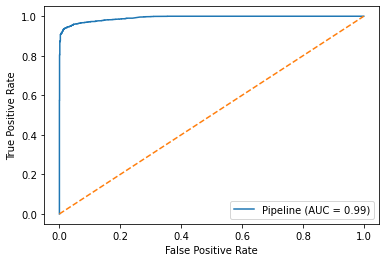

In [78]:
# Plots the ROC curve and visualizes the AUC score
plot_roc_curve(pipe, X_test, y_test)
plt.plot([0,1],[0,1], label='baseline', linestyle='--');

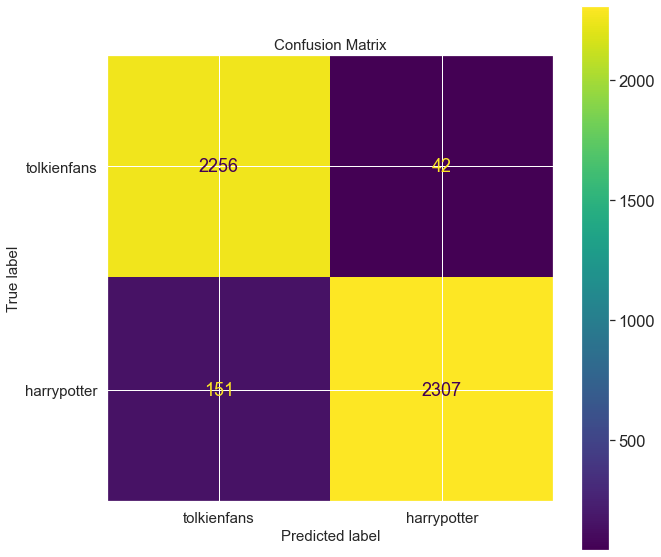

In [88]:
# Creates the confusion matrix and saves it as an image
sns.set(font_scale=1.5)
cm = confusion_matrix(y_test, y_preds)
fig, ax = plt.subplots(figsize=(10, 10))
plot = ConfusionMatrixDisplay(cm).plot(ax=ax)
plot
plt.title('Confusion Matrix')
ax.set_title('Confusion Matrix', fontdict={'size':'15'})
ax.set_xticklabels(df['subreddit'].unique(), size=15);
ax.set_yticklabels(df['subreddit'].unique(), size=15);
ax.set_xlabel('Predicted label', fontdict={'size':'15'})
ax.set_ylabel('True label', fontdict={'size':'15'})

plt.savefig('../../../presentation/imgs/cm_rf_tfidf_stem.jpg')

In [1]:
dir(pipe.named_steps['rf'])

NameError: name 'pipe' is not defined

In [83]:
# Finds the feature importances from the random forst pipeline
importances = pipe.named_steps['rf'].feature_importances_

In [84]:
importances

array([2.34763884e-06, 8.32238979e-05, 3.19535234e-05, ...,
       1.43696118e-04, 2.04106752e-04, 2.17689483e-04])

In [85]:
# finds the feature names through th pipeline in tfidfvectorizer
names = pipe.named_steps['tvec'].get_feature_names()

In [86]:
# Creates the feature importance dictionary and shows the top 10
importance_dict = pd.DataFrame({'feature_importance': importances,
                                'features': names})
top10 = importance_dict.nlargest(10, columns=['feature_importance'])
top10

,feature_importance,features
1780,0.090218,tolkien
799,0.070294,harri
1479,0.035189,ring
1045,0.031287,lotr
839,0.030563,hobbit
1332,0.027541,potter
801,0.023319,harri potter
1573,0.021048,silmarillion
1511,0.020870,sauron
842,0.019164,hogwart


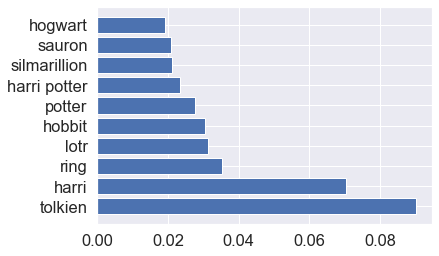

In [90]:
# Visualizes the feature importances 

# plt.bar(x='features', height='feature_importances', data=top10);
plt.barh(top10['features'], top10['feature_importance']);
plt.savefig('../../../presentation/imgs/rf_tfidf_stem_featureImp.jpg')